In [1]:
import pandas as pd
import numpy as np
import datetime
import collections
import matplotlib.pyplot as plot
import seaborn as sns
import statsmodels.formula.api as sm
import statsmodels.api as stat
from sklearn.model_selection import train_test_split
import statsmodels.api as stat
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

## Creating the `philhealthSummary` Table

In [2]:
philhealth = pd.read_csv("Philhealth Records.csv")
NDWI = pd.read_csv("NDWI_Result.csv")
FAPAR = pd.read_csv("FAPAR_Result.csv")


#### Brgy Name Cleaning

In [62]:
changeList = [("DOÏ¿½A IMELDA","DONA IMELDA"),
              ("DOÏ¿½A JOSEFA","DONA JOSEFA"),
              ("LÑ LomÑ","LA LOMA"),
              ("NovÑliches Proper","NOVALICHES PROPER"),
              ("PÑÑng Bundok","PAANG BUNDOK"),
              ("SANTO NIÏ¿½O","SANTO NINO"),
              ('0','N.A.'),
              ('BALINTAWAK','BALINGASA'),
              ('BGY. MARILAG PROJ 4','MARILAG'),
              ('BLOCK 7 LOT 12 PHASE 3 DORMITORY NAGKAISANG NAYON NOVALICHES','NOVALICHES PROPER'),
              ('BRGY. MANRESA','MANRESA'),
              ('CUBAO','KAUNLARAN'),
              ('CUBAO SOCORRO','SOCORRO'),
              ('DILIMAN','KRUS NA LIGAS'),
              ('DOÑA AURORA.','AURORA'),
              ('GILMORE','VALENCIA'),
              ('GSIS VILL. PROJ.','SANGANDAAN'),
              ('LA LOMA','N.S. AMORANTO'),
              ('LOYOLA HGTS','KATIPUNAN'),
              ('MEMBERTOWNCITY','N.A.'),
              ('MIRANILA HOMES SUBD.','CULIAT'),
              ('NARRA','AMIHAN'),
              ('NORTH FAIRVIEW','FAIRVIEW'),
              ('OZ EP VILLAGE CGEA','N.A.'),
              ('PASONG PUTIK PROPER (PASONG PUTIK)','PASONG PUTIK PROPER'),
              ('PROJ 4','ESCOPA I'),
              ('PROJECT 4','ESCOPA I'),
              ('PROJECT 8','SANGANDAAN'),
              ('Project 7','BUNGAD'),
              ('QUEENSLAND SUBD NAGKAISANG NAYON NOVALICHES','NOVALICHES PROPER'),
              ('QUEZON CITY','N.A.'),
              ('QUEZON CITY CPO','N.A.'),
              ('SUNFLOWERLANE BELLEVUE','BALINGASA'),
              ('Ñ12 M.AQUINO ST.BARIO STA LUCIA NOVALICHES','NOVALICHES PROPER'),
              ('Ñ23 A SARMENTO ST; SANTA MONICA','SANTA MONICA'),
              ('Ñ99 SAUYO RD NOVALICHES','NOVALICHES PROPER'),
              ('BGY. COMMONWEALTH','COMMONWEALTH'),
              ('COMMONWELTH','COMMONWEALTH'),
              ('BRGY LAGING HANDA','LAGING HANDA'),
              ('BRGY PASONG TAMO','PASONG TAMO'),
              ('BRGY. KRUS NA LIGAS U.P. DILIMAN','KRUS NA LIGAS'),
              ('ESCOPA 1','ESCOPA I'),
              ('L-4 B-16 TUPAZ ST. DOÑA ROSARIO SUBD. NOVALICHES','NOVALICHES PROPER'),
              ('BLOCK 14 LOT 2 MAGNOLIA STREET ROLLING M SAN BARTOLOME NOVALICHES','NOVALICHES PROPER'),
              ('BLOCK 21 LOT 14 EVERLASTING STREET MALIGAYA PARK PASONG PUTIK NOVALICHES','NOVALICHES PROPER'),
              ('BLK 16 LOT 16 LUPANG PANGAKO PHASE 1 BRGY. PAYATAS','PAYATAS'),
              ('L-4 B-16 TUPAZ ST. DOÑA ROSARIO SUBD. NOVALICHES','NOVALICHES PROPER'),
              ('LOT 5 5-A ABAD SANTOS SANTA LUCIA NOVALICHES','NOVALICHES PROPER'),
              ('LOT 5 BLK 19 DON MARIANO ST GREENFIELD III NOVALICHES MALASIN','NOVALICHES PROPER'),
              ('NOVALICHES','NOVALICHES PROPER'),
              ('NovÑliches Proper','NOVALICHES PROPER'),
              ('SANGANDAAN NOVA','SANGANDAAN'),
              ('SAUYO NOVALICHES','SAUYO'),
              ('STO. CRISTO','SANTO CRISTO'),
              ('STA MONICA','SANTA MONICA'),
              ('SEMINARYO BRGY BAGBAG NOVALICHES','BAGBAG'),
              ("DO�A IMELDA","DONA IMELDA"),
              ("DO�A JOSEFA","DONA JOSEFA"),
              ("SANTO NI�O","SANTO NINO"),
              ("BATASAN HILLS","CONSTITUTION HILLS"),
              ("SANTO DOMINGO (MATALAHIB)","MATALAHIB"),
              ('N.S. AMORANTO (GINTONG SILAHIS)','N.S. AMORANTO'),
              ('DOÑA IMELDA','DONA IMELDA'),
              ('DOÑA JOSEFA','DONA JOSEFA'),
              ('SANTO NIÑO','SANTO NINO')]

In [6]:
for item in changeList:
    philhealth.loc[list(np.where(philhealth['Barangay']==item[0])[0]),['Barangay']] = item[1]
    FAPAR.loc[list(np.where(FAPAR['Barangay']==item[0])[0]),['Barangay']] = item[1]
    NDWI.loc[list(np.where(NDWI['Barangay']==item[0])[0]),['Barangay']] = item[1]

In [43]:
philhealth = philhealth[philhealth['Barangay']!='N.A.']

#### Date cleaning for `philhealth`

In [7]:
philhealth['Date'] = [item[0:7] for item in philhealth['DATE_ADM']]
philhealth['Month'] = [int(item[5:7]) for item in philhealth['DATE_ADM']]

#### Dengue classification

In [9]:
collections.Counter(philhealth['ILLNESS_DESC'])


Counter({'DENGUE WITHOUT WARNING SIGNS': 4068,
         'DENGUE WITH WARNING SIGNS': 6502,
         'SEVERE DENGUE': 690,
         'DENGUE WITHOUT WARNING SIGNS; DENGUE FEVER (DF) DENGUE HAEMORRHAGIC FEVER GRADES 1 AND 2; DENGUE HAEMORRHAGIC FEVER WITHOUT WARNING SIGNS': 3729,
         'DENGUE WITH WARNING SIGNS; DENGUE HAEMORRHAGIC FEVER WITH WARNING SIGNS': 7333,
         'SEVERE DENGUE; SEVERE DENGUE FEVER; SEVER DENGUE HAEMORRHAGIC FEVER': 834})

In [10]:
philhealth['ILLNESS_DESC'][np.where(philhealth['ILLNESS_DESC']=='DENGUE WITHOUT WARNING SIGNS; DENGUE FEVER (DF) DENGUE HAEMORRHAGIC FEVER GRADES 1 AND 2; DENGUE HAEMORRHAGIC FEVER WITHOUT WARNING SIGNS')[0]] = "DENGUE HAEMORRHAGIC FEVER WITHOUT WARNING SIGNS"
philhealth['ILLNESS_DESC'][np.where(philhealth['ILLNESS_DESC']=='DENGUE WITH WARNING SIGNS; DENGUE HAEMORRHAGIC FEVER WITH WARNING SIGNS')[0]] = "DENGUE HAEMORRHAGIC FEVER WITH WARNING SIGNS"
philhealth['ILLNESS_DESC'][np.where(philhealth['ILLNESS_DESC']=='SEVERE DENGUE; SEVERE DENGUE FEVER; SEVER DENGUE HAEMORRHAGIC FEVER')[0]] = "SEVERE DENGUE HAEMORRHAGIC FEVER"


/Users/lorenzoflores/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/lorenzoflores/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/lorenzoflores/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Thi

In [11]:
philhealth = pd.concat([philhealth, pd.get_dummies(philhealth['ILLNESS_DESC'])], axis=1)


#### Aggregating dengue counts by barangay and type

In [12]:
philhealthMain = philhealth[['ADDRESS','Barangay','Date']].groupby(['Barangay','Date']).agg(['count'])
philhealthAge = philhealth[['PATIENT AGE','Barangay','Date']].groupby(['Barangay','Date']).agg(['mean'])

In [13]:
philhealthDisease = philhealth[['DENGUE HAEMORRHAGIC FEVER WITH WARNING SIGNS',
                                'DENGUE HAEMORRHAGIC FEVER WITHOUT WARNING SIGNS',
                                'DENGUE WITH WARNING SIGNS', 'DENGUE WITHOUT WARNING SIGNS',
                                'SEVERE DENGUE', 'SEVERE DENGUE HAEMORRHAGIC FEVER','Barangay','Date']].groupby(['Barangay','Date']).agg(['sum'])

In [14]:
philhealthSummary = philhealthAge.merge(philhealthMain.merge(philhealthDisease, how='left', on=['Barangay','Date']), how='left', on=['Barangay','Date'])

In [15]:
philhealthSummary = philhealthSummary.reset_index(level=[0,1])


#### Dates for `philhealthSummary`

In [19]:
philhealthSummary['Month'] = [int(item[5:7]) for item in philhealthSummary['Date']]
philhealthSummary['Year'] = [int(item[0:4]) for item in philhealthSummary['Date']]

#### Filling in `missingRows` (i.e. records for barangays with no dengue for a given month)

In [20]:
missingRows = []
for item in set(philhealthSummary['Barangay']):
    for year in [2016,2017,2018]:
        for month in range(1,13):
            if len(np.where((philhealthSummary['Year']==year) & (philhealthSummary['Month']==month) & (philhealthSummary['Barangay']==item))[0]) == 0:
                missingRows.append([item,str(year)+"-"+str(month),0.0,0,0,0,0,0,0,0,month,year])


In [23]:
missingRows = pd.DataFrame.from_records(missingRows)


In [60]:
missingRows = missingRows[missingRows['Barangay']!='N.A.']

#### Fixing `philhealthSummary` and `missingRows` column names and data types

In [25]:
philhealthSummary.columns = ['Barangay','Date','Age','Address','DenWarn','DenNoWarn','DenSev','HemWarn','HemNoWarn','HemSev','Month','Year']
missingRows.columns = ['Barangay','Date','Age','Address','DenWarn','DenNoWarn','DenSev','HemWarn','HemNoWarn','HemSev','Month','Year']


In [26]:
philhealthSummary['Barangay'] = philhealthSummary.Barangay.astype(str)
philhealthSummary['Date'] = philhealthSummary.Date.astype(str)
philhealthSummary['DenWarn'] = philhealthSummary.DenWarn.astype(int)
philhealthSummary['DenNoWarn'] = philhealthSummary.DenNoWarn.astype(int)
philhealthSummary['DenSev'] = philhealthSummary.DenSev.astype(int)
philhealthSummary['HemWarn'] = philhealthSummary.HemWarn.astype(int)
philhealthSummary['HemNoWarn'] = philhealthSummary.HemNoWarn.astype(int)
philhealthSummary['HemSev'] = philhealthSummary.HemSev.astype(int)



#### `missingRows` Ages

In [51]:
qcAges = pd.read_csv("QC_Data_2015.csv")
m = qcAges.iloc[:,range(9,110)].to_numpy()
n = np.arange(0,101).T
qcAges['add'] = np.dot(m,n)
qcAges['total'] = qcAges.iloc[:,range(9,110)].sum(axis=1)
qcAges = qcAges[['adm4_name','add','total']]
qcAges = qcAges.groupby('adm4_name').agg(['sum'])
qcAges = qcAges.reset_index(level=0)
qcAges.columns = [''.join(x) for x in qcAges.columns]
qcAges['ave'] = qcAges['addsum']/qcAges['totalsum']
qcAges['adm4_name'] = [item.upper() for item in qcAges['adm4_name']]
qcAges = qcAges[['adm4_name','ave']]


In [63]:
for item in changeList:
    qcAges.loc[list(np.where(qcAges['adm4_name']==item[0])[0]),['adm4_name']] = item[1]


In [66]:
missingRows = pd.merge(missingRows, qcAges, left_on='Barangay', right_on='adm4_name')
missingRows['Age'] = missingRows['ave']

In [70]:
missingRows = missingRows.drop(['ave','adm4_name'],axis=1)

In [71]:
philhealthSummary = philhealthSummary.append(missingRows)
philhealthSummary = philhealthSummary.reset_index()

#### Add in NDWI and FAPAR

In [72]:
FAPAR = FAPAR[['Barangay','FAPAR','lon','lat','Year','Month']]
NDWI = NDWI[['Barangay','NDWI','lon','lat','Year','Month']]

In [73]:
FAPAR['Barangay'] = [item.upper() for item in FAPAR['Barangay']]
NDWI['Barangay'] = [item.upper() for item in NDWI['Barangay']]


In [74]:
philhealthSummary = philhealthSummary.merge(NDWI,how='left',on=['Barangay','Year','Month'])
philhealthSummary = philhealthSummary.merge(FAPAR[['Barangay','Year','Month','FAPAR']],how='left',on=['Barangay','Year','Month'])
philhealthSummary['Barangay'] = pd.Series(philhealthSummary['Barangay'], dtype = 'category')
philhealthSummary = pd.concat([philhealthSummary, pd.get_dummies(philhealthSummary['Barangay'])], axis=1)


#### Classifying risk

In [76]:
philhealthSummary['Binary'] = 1*(philhealthSummary['Address'] > 0)
philhealthSummary['medRisk'] = 1*(philhealthSummary['Address'] > 9)
philhealthSummary['highRisk'] = 1*(philhealthSummary['Address'] > 19)


#### Population by Barangay

In [77]:
qc = pd.read_csv('QC_Barangays_2015 - Sheet1.csv')

In [78]:
qc['Name'] = [item.upper() for item in qc['Name']]

In [79]:
philhealthSummary = pd.merge(philhealthSummary,qc,left_on='Barangay',right_on='Name')

In [80]:
philhealthSummary

,index,Barangay,Date,Age,Address,DenWarn,DenNoWarn,DenSev,HemWarn,HemNoWarn,...,WEST TRIANGLE,WHITE PLAINS,Binary,medRisk,highRisk,Name,City,Area,Density,Pop
0,0,ALICIA,2016-01,16.000000,1,0,0,1,0,0,...,0,0,1,0,0,ALICIA,Quezon City,0.11,58287.19,6411.5909
1,1,ALICIA,2016-02,15.000000,1,0,0,1,0,0,...,0,0,1,0,0,ALICIA,Quezon City,0.11,58287.19,6411.5909
2,2,ALICIA,2016-03,13.000000,1,0,0,1,0,0,...,0,0,1,0,0,ALICIA,Quezon City,0.11,58287.19,6411.5909
3,3,ALICIA,2016-06,16.000000,1,0,0,1,0,0,...,0,0,1,0,0,ALICIA,Quezon City,0.11,58287.19,6411.5909
4,4,ALICIA,2016-07,15.000000,4,0,0,2,2,0,...,0,0,1,0,0,ALICIA,Quezon City,0.11,58287.19,6411.5909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4820,875,WHITE PLAINS,2017-5,36.685539,0,0,0,0,0,0,...,0,1,0,0,0,WHITE PLAINS,Quezon City,0.57,8296.97,4729.2729
4821,876,WHITE PLAINS,2017-10,36.685539,0,0,0,0,0,0,...,0,1,0,0,0,WHITE PLAINS,Quezon City,0.57,8296.97,4729.2729
4822,877,WHITE PLAINS,2018-4,36.685539,0,0,0,0,0,0,...,0,1,0,0,0,WHITE PLAINS,Quezon City,0.57,8296.97,4729.2729
4823,878,WHITE PLAINS,2018-5,36.685539,0,0,0,0,0,0,...,0,1,0,0,0,WHITE PLAINS,Quezon City,0.57,8296.97,4729.2729


In [81]:
philhealthSummary.to_csv("philhealthSummary.csv")

### Data Exploration
#### Notes/Assumptions

* Goal is to predict occurrence of dengue, so even 1 case already counts
* People have equal probability of being infected, and probability of coming in for treatment is uniform across age, thus `Age` is causal
* FAPAR and NDWI do not correlate with Month nor Year (see below), since they are reflective of water density on the Barangay level, which takes into account Barangay characteristics and rainfall – therefore FAPAR, NDWI, Month, and Year are included
* The split on `Binary` is 56% yes, 44% no

#### Visualization

* Maybe dengue isn't dependent on NDWI and FAPAR only but also needs to have Barangay characteristics controlled for? – these then correlate with lon and lat – characteristics such as cleanliness and building characteristics that provide areas for mosquitoes to breed that are not necessarily picked up by NDWI/FAPAR.
* Some barangays are more prone to dengue because of these characteristics
* Goal will be given a barangay and the month, predict whether or not it will experience dengue

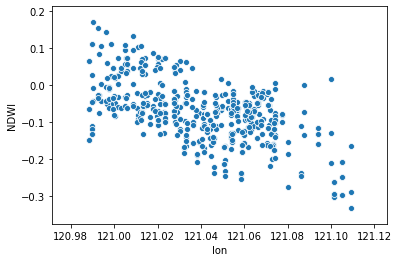

In [34]:
sns.scatterplot(philhealthSummary[philhealthSummary['Month']==8]['lon'],
                philhealthSummary[philhealthSummary['Month']==8]['NDWI'])


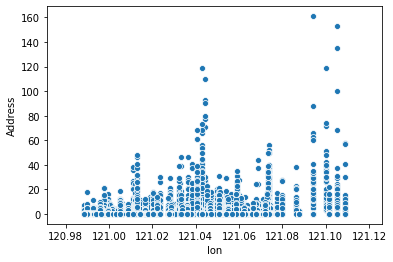

In [35]:
sns.scatterplot(philhealthSummary['lon'],
                philhealthSummary['Address'])

* Seems that the Barangays don't all follow the same patterns with NDWI/FAPAR by month – meaning some Barangays experience larger changes in NDWI and FAPAR while others don't
* Supports idea that Barangays have individual characteristics that make them more or less prone to dengue, ASIDE from NDWI/FAPAR - need to provide Barangay name when modeling

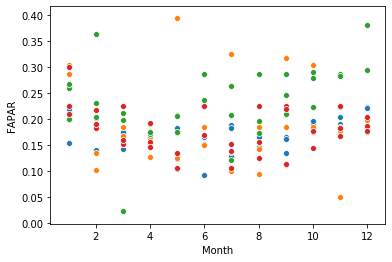

In [36]:
tdsr = philhealthSummary[philhealthSummary['Barangay']=='TANDANG SORA']
esc2 = philhealthSummary[philhealthSummary['Barangay']=='ESCOPA II']
cmpa = philhealthSummary[philhealthSummary['Barangay']=='CAMP AGUINALDO']
erod = philhealthSummary[philhealthSummary['Barangay']=='E. RODRIGUEZ']

sns.scatterplot(tdsr['Month'],tdsr['FAPAR'])
sns.scatterplot(esc2['Month'],esc2['FAPAR'])
sns.scatterplot(cmpa['Month'],cmpa['FAPAR'])
sns.scatterplot(erod['Month'],erod['FAPAR'])

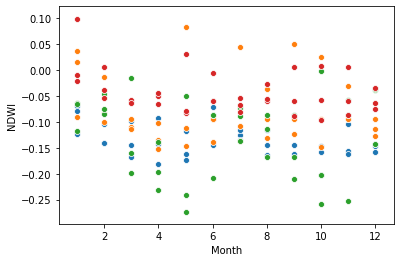

In [37]:
sns.scatterplot(tdsr['Month'],tdsr['NDWI'])
sns.scatterplot(esc2['Month'],esc2['NDWI'])
sns.scatterplot(cmpa['Month'],cmpa['NDWI'])
sns.scatterplot(erod['Month'],erod['NDWI'])

Column Names

const,index,Barangay,Date,Age,Address,DenWarn,DenNoWarn,DenSev,HemWarn,HemNoWarn
HemSev,Month,Year,NDWI,lon,lat,Binary,medRisk,highRisk,M1,M2,M3,M4,M5,M6
M7,M8,M9,M10,M11,M12

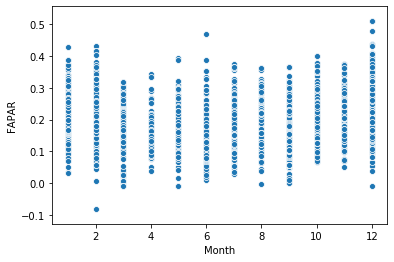

In [38]:
sns.scatterplot(x=philhealthSummary['Month'],y=philhealthSummary['FAPAR'])

* Clear peak during September, and low during April, should NOT be modelled using quadratic – use dummies instead?

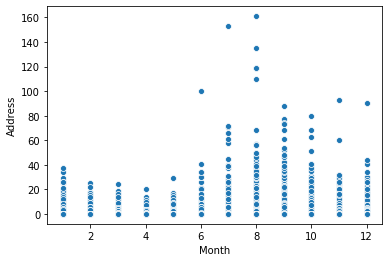

In [39]:
sns.scatterplot(x=philhealthSummary['Month'],y=philhealthSummary['Address'])

* No clear yearly trends

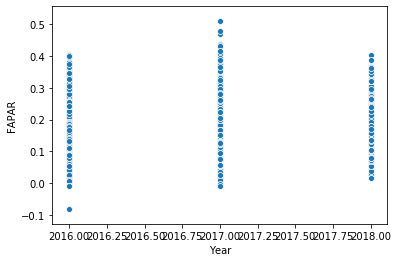

In [40]:
sns.scatterplot(x=philhealthSummary['Year'],y=philhealthSummary['FAPAR'])

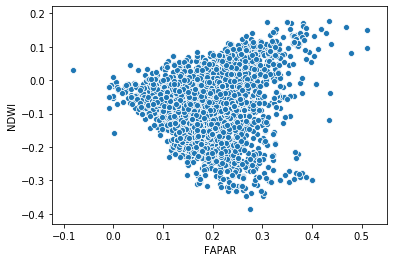

In [41]:
#FAPAR has no correlation with NDWI?
sns.scatterplot(x=philhealthSummary['FAPAR'], y=philhealthSummary['NDWI'])


In [42]:
#sorted(, reverse=True)
median = pd.DataFrame(philhealthSummary.groupby(by=['Barangay'])['Address'].median())
median = median.sort_values(by='Address',ascending=False)
median = median.index

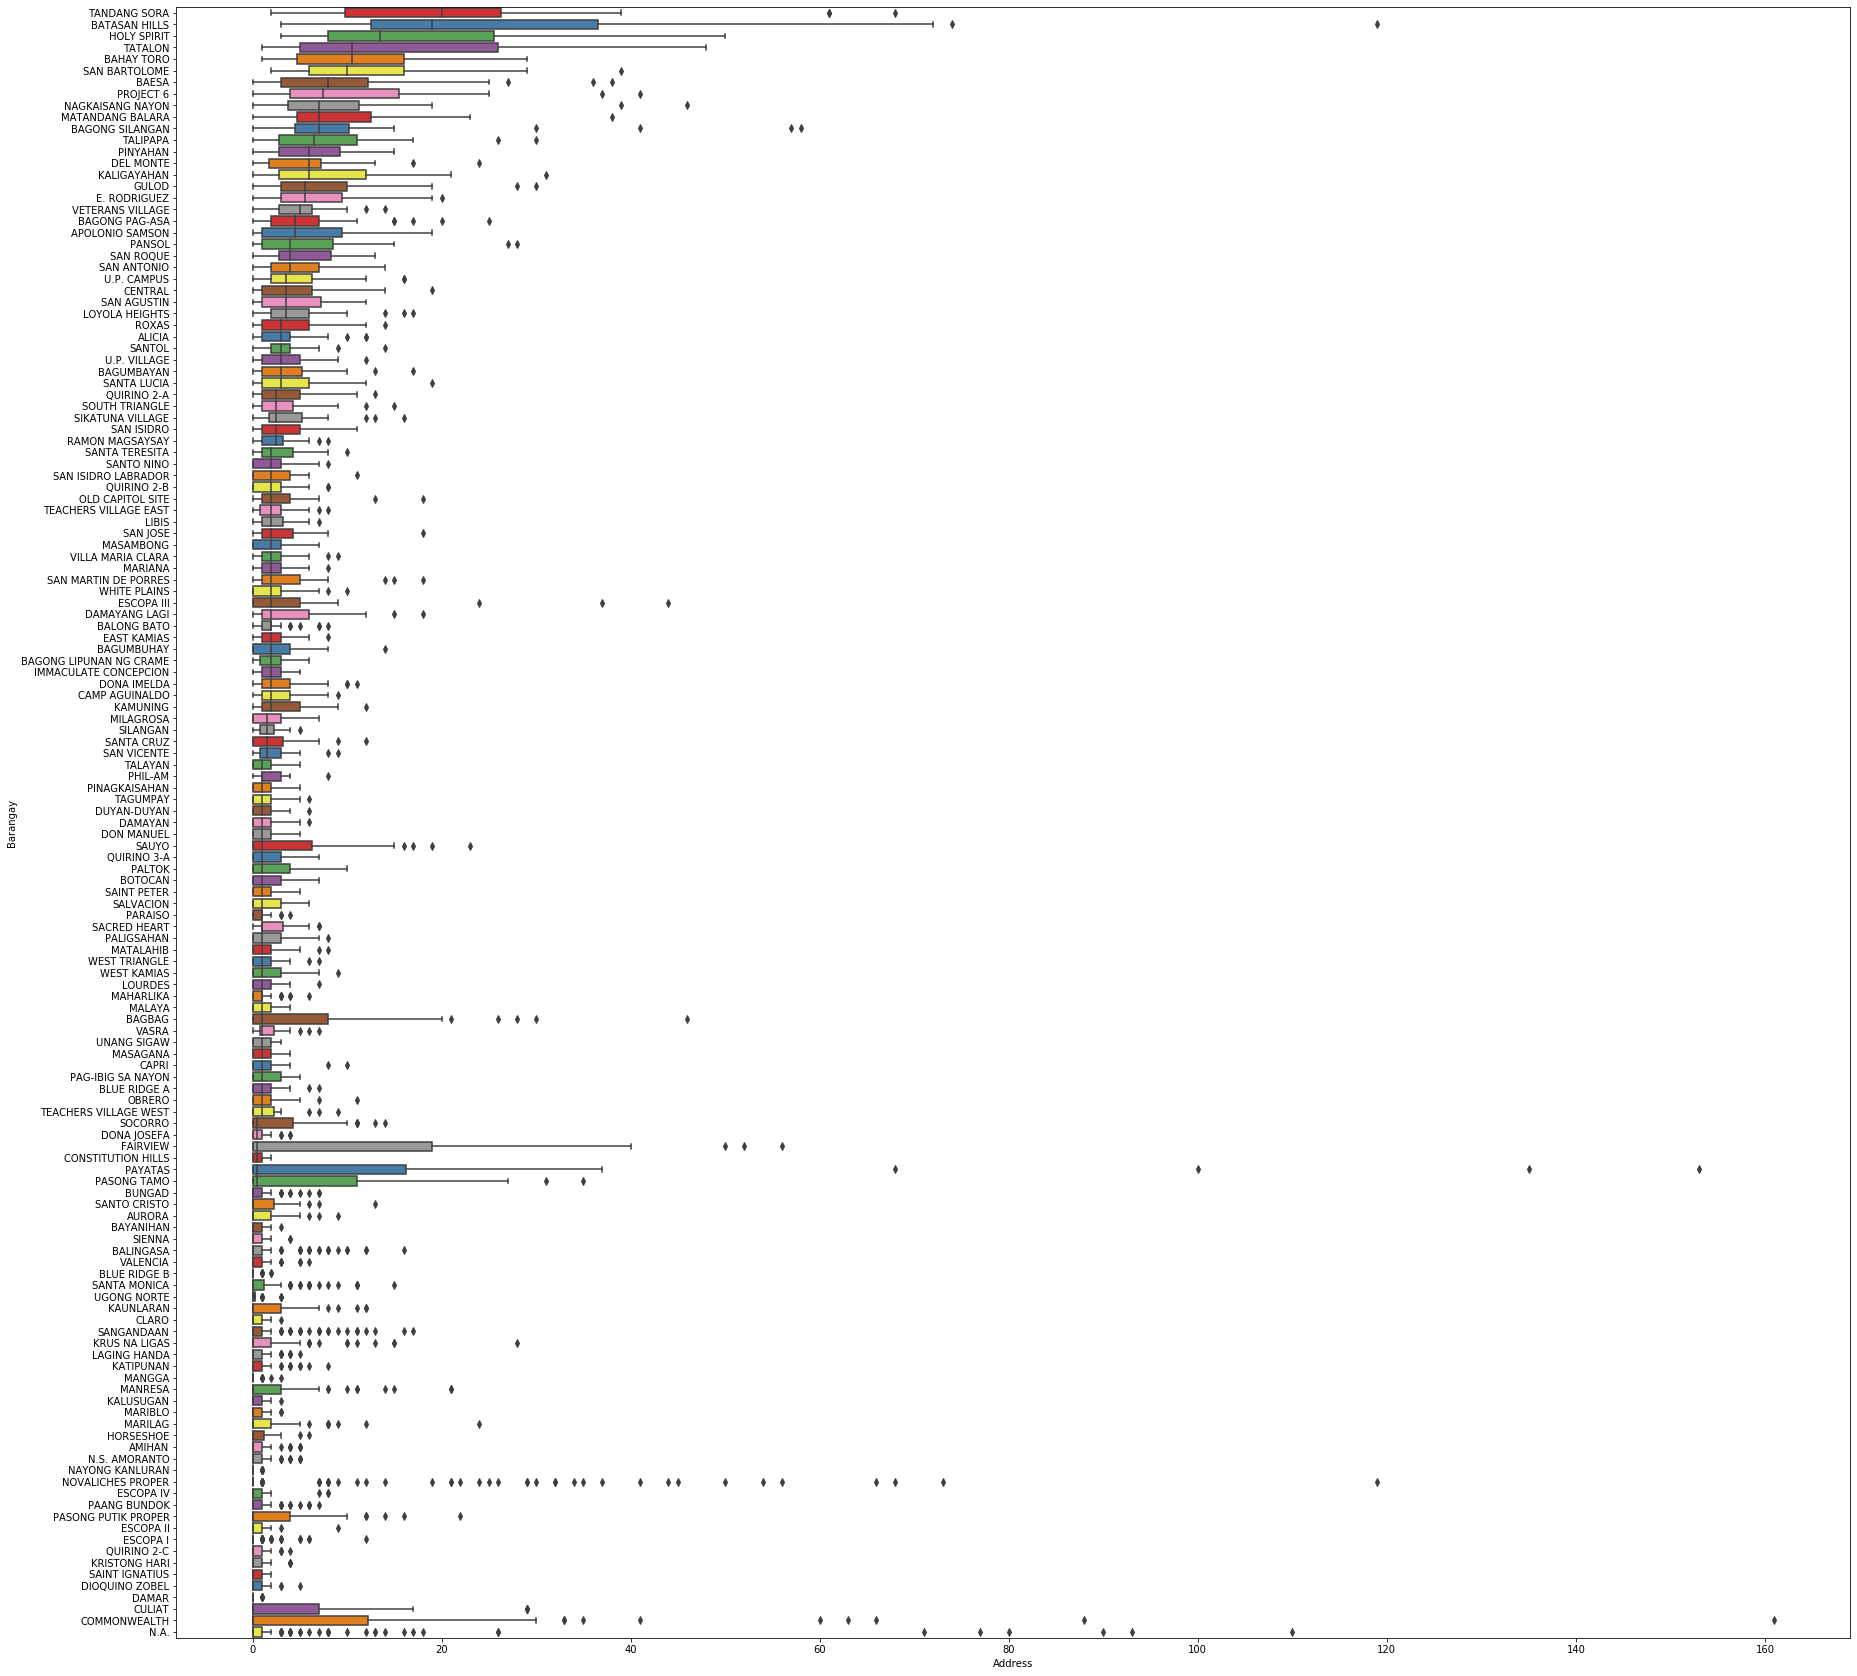

In [43]:
fig, ax = plot.subplots(figsize=(30,30))
sns.boxplot(ax=ax, y='Barangay', x='Address', 
            data=philhealthSummary, palette="Set1", 
            order=median, orient='h')


#### Modeling

In [44]:
for i in range(len(philhealthSummary.columns)):
    philhealthSummary.rename(columns={philhealthSummary.columns[i]:philhealthSummary.columns[i].replace(' ','_').replace('.','').replace('-','')}, inplace=True)
brgyNames = ' + '.join(list(philhealthSummary.columns[17:158]))



In [45]:
brgyNames

'FAPAR + ALICIA + AMIHAN + APOLONIO_SAMSON + AURORA + BAESA + BAGBAG + BAGONG_LIPUNAN_NG_CRAME + BAGONG_PAGASA + BAGONG_SILANGAN + BAGUMBAYAN + BAGUMBUHAY + BAHAY_TORO + BALINGASA + BALONG_BATO + BATASAN_HILLS + BAYANIHAN + BLUE_RIDGE_A + BLUE_RIDGE_B + BOTOCAN + BUNGAD + CAMP_AGUINALDO + CAPRI + CENTRAL + CLARO + COMMONWEALTH + CONSTITUTION_HILLS + CULIAT + DAMAR + DAMAYAN + DAMAYANG_LAGI + DEL_MONTE + DIOQUINO_ZOBEL + DON_MANUEL + DONA_IMELDA + DONA_JOSEFA + DUYANDUYAN + E_RODRIGUEZ + EAST_KAMIAS + ESCOPA_I + ESCOPA_II + ESCOPA_III + ESCOPA_IV + FAIRVIEW + GULOD + HOLY_SPIRIT + HORSESHOE + IMMACULATE_CONCEPCION + KALIGAYAHAN + KALUSUGAN + KAMUNING + KATIPUNAN + KAUNLARAN + KRISTONG_HARI + KRUS_NA_LIGAS + LAGING_HANDA + LIBIS + LOURDES + LOYOLA_HEIGHTS + MAHARLIKA + MALAYA + MANGGA + MANRESA + MARIANA + MARIBLO + MARILAG + MASAGANA + MASAMBONG + MATALAHIB + MATANDANG_BALARA + MILAGROSA + NA + NS_AMORANTO + NAGKAISANG_NAYON + NAYONG_KANLURAN + NOVALICHES_PROPER + OBRERO + OLD_CAPITOL_S

In [63]:
X = philhealthSummary[['NDWI','FAPAR','M1','M2','M3','M4','M5','M6','M7','M8','M9','M10','M11','M12']]
y = philhealthSummary['Binary']

X_noZero = philhealthSummary[philhealthSummary['Binary']==1]
y_noZero = philhealthSummary[philhealthSummary['Binary']==1]['Address']


In [64]:
sum(philhealthSummary['Binary'])/len(philhealthSummary['Binary'])

0.5612274578243165

In [72]:
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore') 

lr = LogisticRegression(solver='lbfgs', multi_class='multinomial')

for i in np.arange(0,1,0.05):
    X_train, X_test, y_train, y_test = train_test_split(X_noZero, y_noZero, test_size=0.33)
    lr.fit(X_train, y_train)
    print(str(i)+": "+str(sum(1*([item[1] for item in lr.predict_proba(X_test)]>i) == y_test)/len(y_test)))


ValueError: could not convert string to float: '2016-09'

In [49]:
sum(philhealthSummary['highRisk'])/len(philhealthSummary['highRisk'])

0.031995346131471786

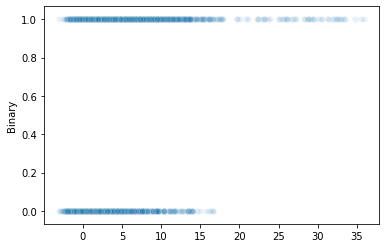

In [50]:
X_train, X_test, y_train, y_test = train_test_split(philhealthSummary.drop("Address",axis=1), philhealthSummary['Address'], test_size=0.33)
model = sm.ols(formula = 'y_train ~ NDWI + FAPAR + M1 + M2 + M3 + M4 + M5 + M6 + M7 + M8 + M9 + M10 + M11 + M12 +'+brgyNames, 
                   data=X_train).fit()
X_ols = model.predict(X_train)
y_ols = X_train['Binary']
sns.scatterplot(X_ols,y_ols,y_jitter=True,alpha=0.1)


In [51]:
for i in np.arange(0,1,0.05):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    model = sm.ols(formula = 'y_train ~ NDWI + FAPAR + M1 + M2 + M3 + M4 + M5 + M6 + M7 + M8 + M9 + M10 + M11 + M12' 
                   , data=X_train).fit()
    print(str(i)+": "+str(sum(1*(model.predict(X_test)>i)==y_test)/len(y_test)))


0.0: 0.566079295154185
0.05: 0.5687224669603524
0.1: 0.5581497797356828
0.15000000000000002: 0.5599118942731277
0.2: 0.5634361233480176
0.25: 0.5629955947136563
0.30000000000000004: 0.5744493392070484
0.35000000000000003: 0.5647577092511014
0.4: 0.6017621145374449
0.45: 0.6118942731277534
0.5: 0.6140969162995594
0.55: 0.6215859030837004
0.6000000000000001: 0.6026431718061674
0.65: 0.5704845814977973
0.7000000000000001: 0.4669603524229075
0.75: 0.43348017621145374
0.8: 0.4555066079295154
0.8500000000000001: 0.43788546255506605
0.9: 0.4290748898678414
0.9500000000000001: 0.4356828193832599


In [52]:
olsModel = sm.ols(formula = "y ~ np.power(Age,2) + Age + NDWI + FAPAR", 
                  data=X).fit()
olsModel.summary()


PatsyError: Error evaluating factor: NameError: name 'Age' is not defined
    y ~ np.power(Age,2) + Age + NDWI + FAPAR
                          ^^^

In [ ]:
plot.scatter(philhealthSummary['NDWI']*philhealthSummary['FAPAR'],philhealthSummary['Address'])

### Predictions

In [ ]:
import json
import datetime

In [ ]:
fapar2020 = pd.read_csv("FAPAR_Statistics_2020.csv")
ndwi2020 = pd.read_csv("NDWI_Statistics_2020.csv")

In [ ]:
fapar = pd.DataFrame({'Barangay':[],'Date':[],'FAPAR':[]})
for i in range(fapar2020.shape[0]):
    temp = fapar2020['timeseries'][i].strip('][').split("T00:00:00},")
    temp = [item.replace("time=","").replace("nd=","").replace("{","").replace(" ","").replace("}","") for item in temp]
    temp = [("0,"+item) if len(item)==10 else item for item in temp]
    
    values = []
    dates = []
    for item in temp:
        if ',' in item:
            values.append(item.split(',')[0])
            dates.append(item.split(',')[1].replace("T00:00:00",""))
        else:
            pass
    fapar = fapar.append(pd.DataFrame(data = pd.DataFrame({'Barangay':[fapar2020['NAME_3'][i]] * len(values),
                                                                 'Date':dates,
                                                                 'FAPAR':values})), 
                               ignore_index=True)
    


In [ ]:
ndwi = pd.DataFrame({'Barangay':[],'Date':[],'NDWI':[]})
for i in range(ndwi2020.shape[0]):
    temp = ndwi2020['timeseries'][i].strip('][').split("T00:00:00},")
    temp = [item.replace("time=","").replace("nd=","").replace("{","").replace(" ","").replace("}","") for item in temp]
    temp = [("0,"+item) if len(item)==10 else item for item in temp]
    
    values = []
    dates = []
    for item in temp:
        if ',' in item:
            values.append(item.split(',')[0])
            dates.append(item.split(',')[1].replace("T00:00:00",""))
        else:
            pass
    ndwi = ndwi.append(pd.DataFrame(data = pd.DataFrame({'Barangay':[ndwi2020['NAME_3'][i]] * len(values),
                                                                 'Date':dates,
                                                                 'NDWI':values})), 
                               ignore_index=True)
    


In [ ]:
final = ndwi.merge(fapar, on=['Barangay','Date'])
final['Barangay'] = final['Barangay'].str.upper()


In [ ]:
final = final.merge(qcAges[['adm4_name','ave']],left_on='Barangay',right_on='adm4_name')


In [ ]:
final['Month'] = [int(item[5:7]) for item in final['Date']]

In [ ]:
final.rename(columns={'ave':'Age'}, inplace=True)

In [ ]:
plot.hist(olsModel.predict(final))

In [ ]:
final['Barangay'] = final.Barangay.astype(str)
final['Date'] = final.Date.astype(str)
final['NDWI'] = final.NDWI.astype(float)
final['FAPAR'] = final.FAPAR.astype(float)
final['Age'] = final.Age.astype(float)
final['Month'] = final.Month.astype(float)

In [ ]:
plot.hist(final['NDWI'])